# Covid-19 Explorations in Mulnomah County, Portland Oregon

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# remove warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [3]:
dfm = df[(df.Province_State == 'Oregon') & (df.Admin2 == 'Multnomah')]

In [4]:
dfm.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], axis=1, inplace=True)

In [7]:
# list(dfm)
dfm.head()
# dfm.describe()
# dfm.columns.values.tolist()

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [6]:
# Pandas.melt() unpivots a DataFrame from wide format to long format.
dfm = dfm.melt(var_name ='date', value_name='cases')
dfm.set_index('date', inplace=True)

# Converting the index as date
dfm.index = pd.to_datetime(dfm.index)
# dfm.tail()

In [40]:
dfm['new_cases'] = dfm.diff(axis=0)
dfm['new_cases'] = dfm['new_cases'].fillna(0)
dfm.tail()

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2021-03-20,32643,47.0,2021-03-20,423 days,11,2021
2021-03-21,32668,25.0,2021-03-21,424 days,11,2021
2021-03-22,32692,24.0,2021-03-22,425 days,12,2021
2021-03-23,32736,44.0,2021-03-23,426 days,12,2021
2021-03-24,32795,59.0,2021-03-24,427 days,12,2021


In [9]:
# dfm.cases.plot(figsize=(18,8))

<AxesSubplot:xlabel='date'>

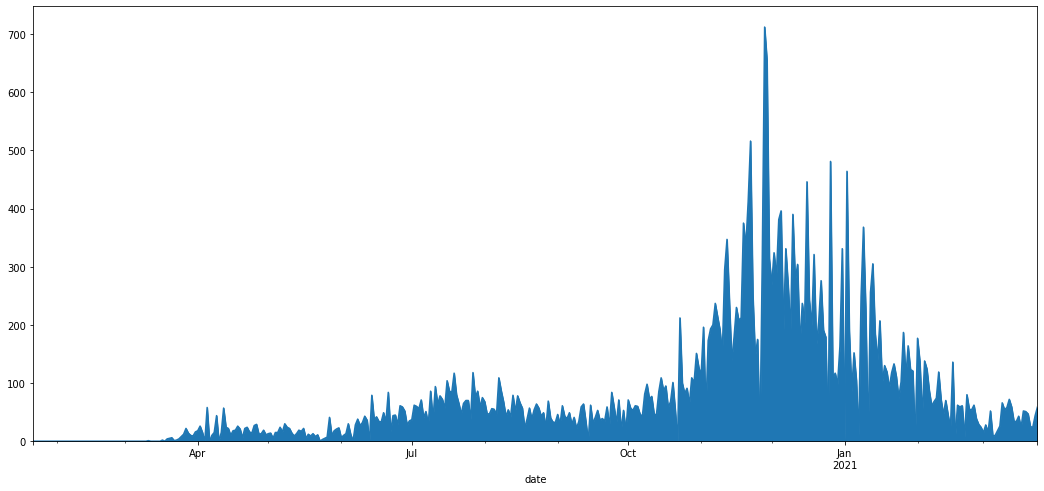

In [79]:
dfm.new_cases.plot(figsize=(18,8), kind='area')

In [81]:
# dfm.plot()

---
## Goal: 
* #### make a visually appealing plot
* #### have `cases` and `new_cases` overlayed on each other
* #### scale `cases` to match with `new_cases`, indicate this scale in the legend

In [39]:
dfm['2020-03-11':'2020-04-11']

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2020-03-11,1,1.0,2020-03-11,49 days,11,2020
2020-03-12,1,0.0,2020-03-12,50 days,11,2020
2020-03-13,1,0.0,2020-03-13,51 days,11,2020
2020-03-14,1,0.0,2020-03-14,52 days,11,2020
2020-03-15,1,0.0,2020-03-15,53 days,11,2020
2020-03-16,1,0.0,2020-03-16,54 days,12,2020
2020-03-17,3,2.0,2020-03-17,55 days,12,2020
2020-03-18,3,0.0,2020-03-18,56 days,12,2020
2020-03-19,7,4.0,2020-03-19,57 days,12,2020


In [26]:
# create column week_number on new_cases
# seaborn histogram
# group by week
dfm['date'] = dfm.index
dfm['date_delta'] = dfm.date.apply(lambda x: x - dfm.iloc[0].date)
dfm['date_week'] = dfm.date.apply(lambda x: x.week)
dfm['date_year'] = dfm.date.apply(lambda x: x.year)
dfm.head()

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2020-01-22,0,NaN,2020-01-22,0 days,4,2020
2020-01-23,0,0.0,2020-01-23,1 days,4,2020
2020-01-24,0,0.0,2020-01-24,2 days,4,2020
2020-01-25,0,0.0,2020-01-25,3 days,4,2020
2020-01-26,0,0.0,2020-01-26,4 days,4,2020


In [61]:
# dfm.iloc[1].date - dfm.iloc[0].date

In [60]:
# sns.histplot(data=dfm, x=dfm.date_week, y=dfm.new_cases)

In [54]:
# dfm['2020-03-11':'2020-04-30']
dfm.tail()

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2021-03-20,32643,47.0,2021-03-20,423 days,11,2021
2021-03-21,32668,25.0,2021-03-21,424 days,11,2021
2021-03-22,32692,24.0,2021-03-22,425 days,12,2021
2021-03-23,32736,44.0,2021-03-23,426 days,12,2021
2021-03-24,32795,59.0,2021-03-24,427 days,12,2021


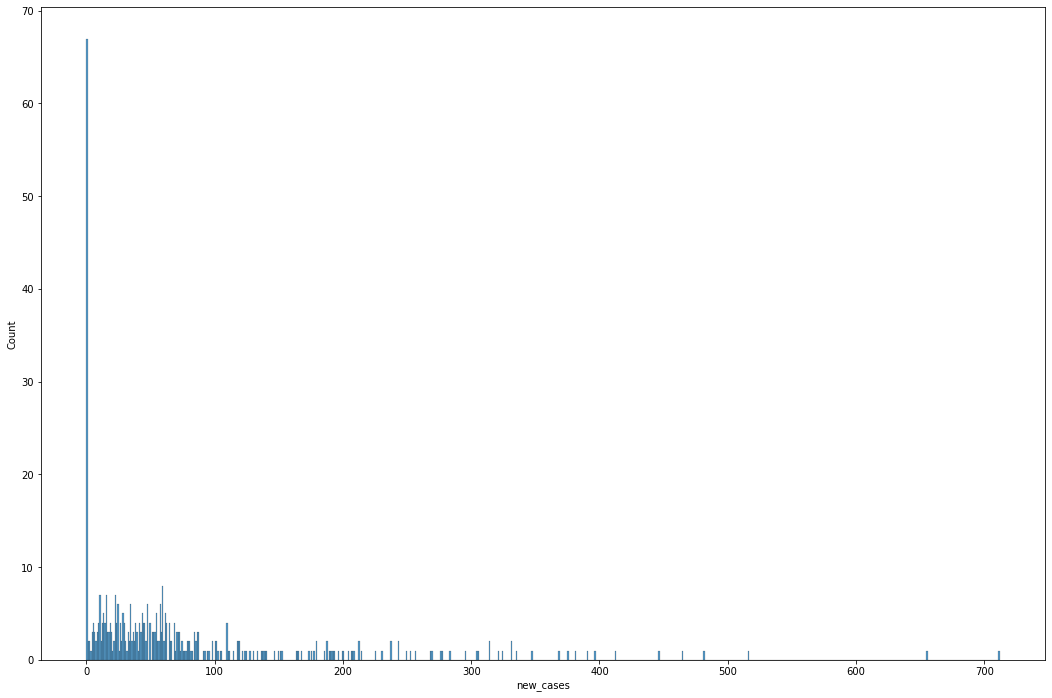

In [62]:
plt.figure(figsize=(18,12))
ax = sns.histplot(dfm, x="new_cases", binwidth=1)

In [83]:
dfm.new_cases.describe()

count    428.000000
mean      76.623832
std      101.116095
min        0.000000
25%       13.000000
50%       44.500000
75%       87.000000
max      712.000000
Name: new_cases, dtype: float64